<a href="https://colab.research.google.com/github/allanstar-byte/KNN-and-Bayessian/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes**

## **Importing libraries**

In [1]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spambase.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## **Data understanding**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
# shape of the data
df.shape

(4601, 58)

## **Data Cleaning**

In [5]:
# checking the null values
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

## **Exploratory Data Analysis**

### **1. Univariate Analysis**

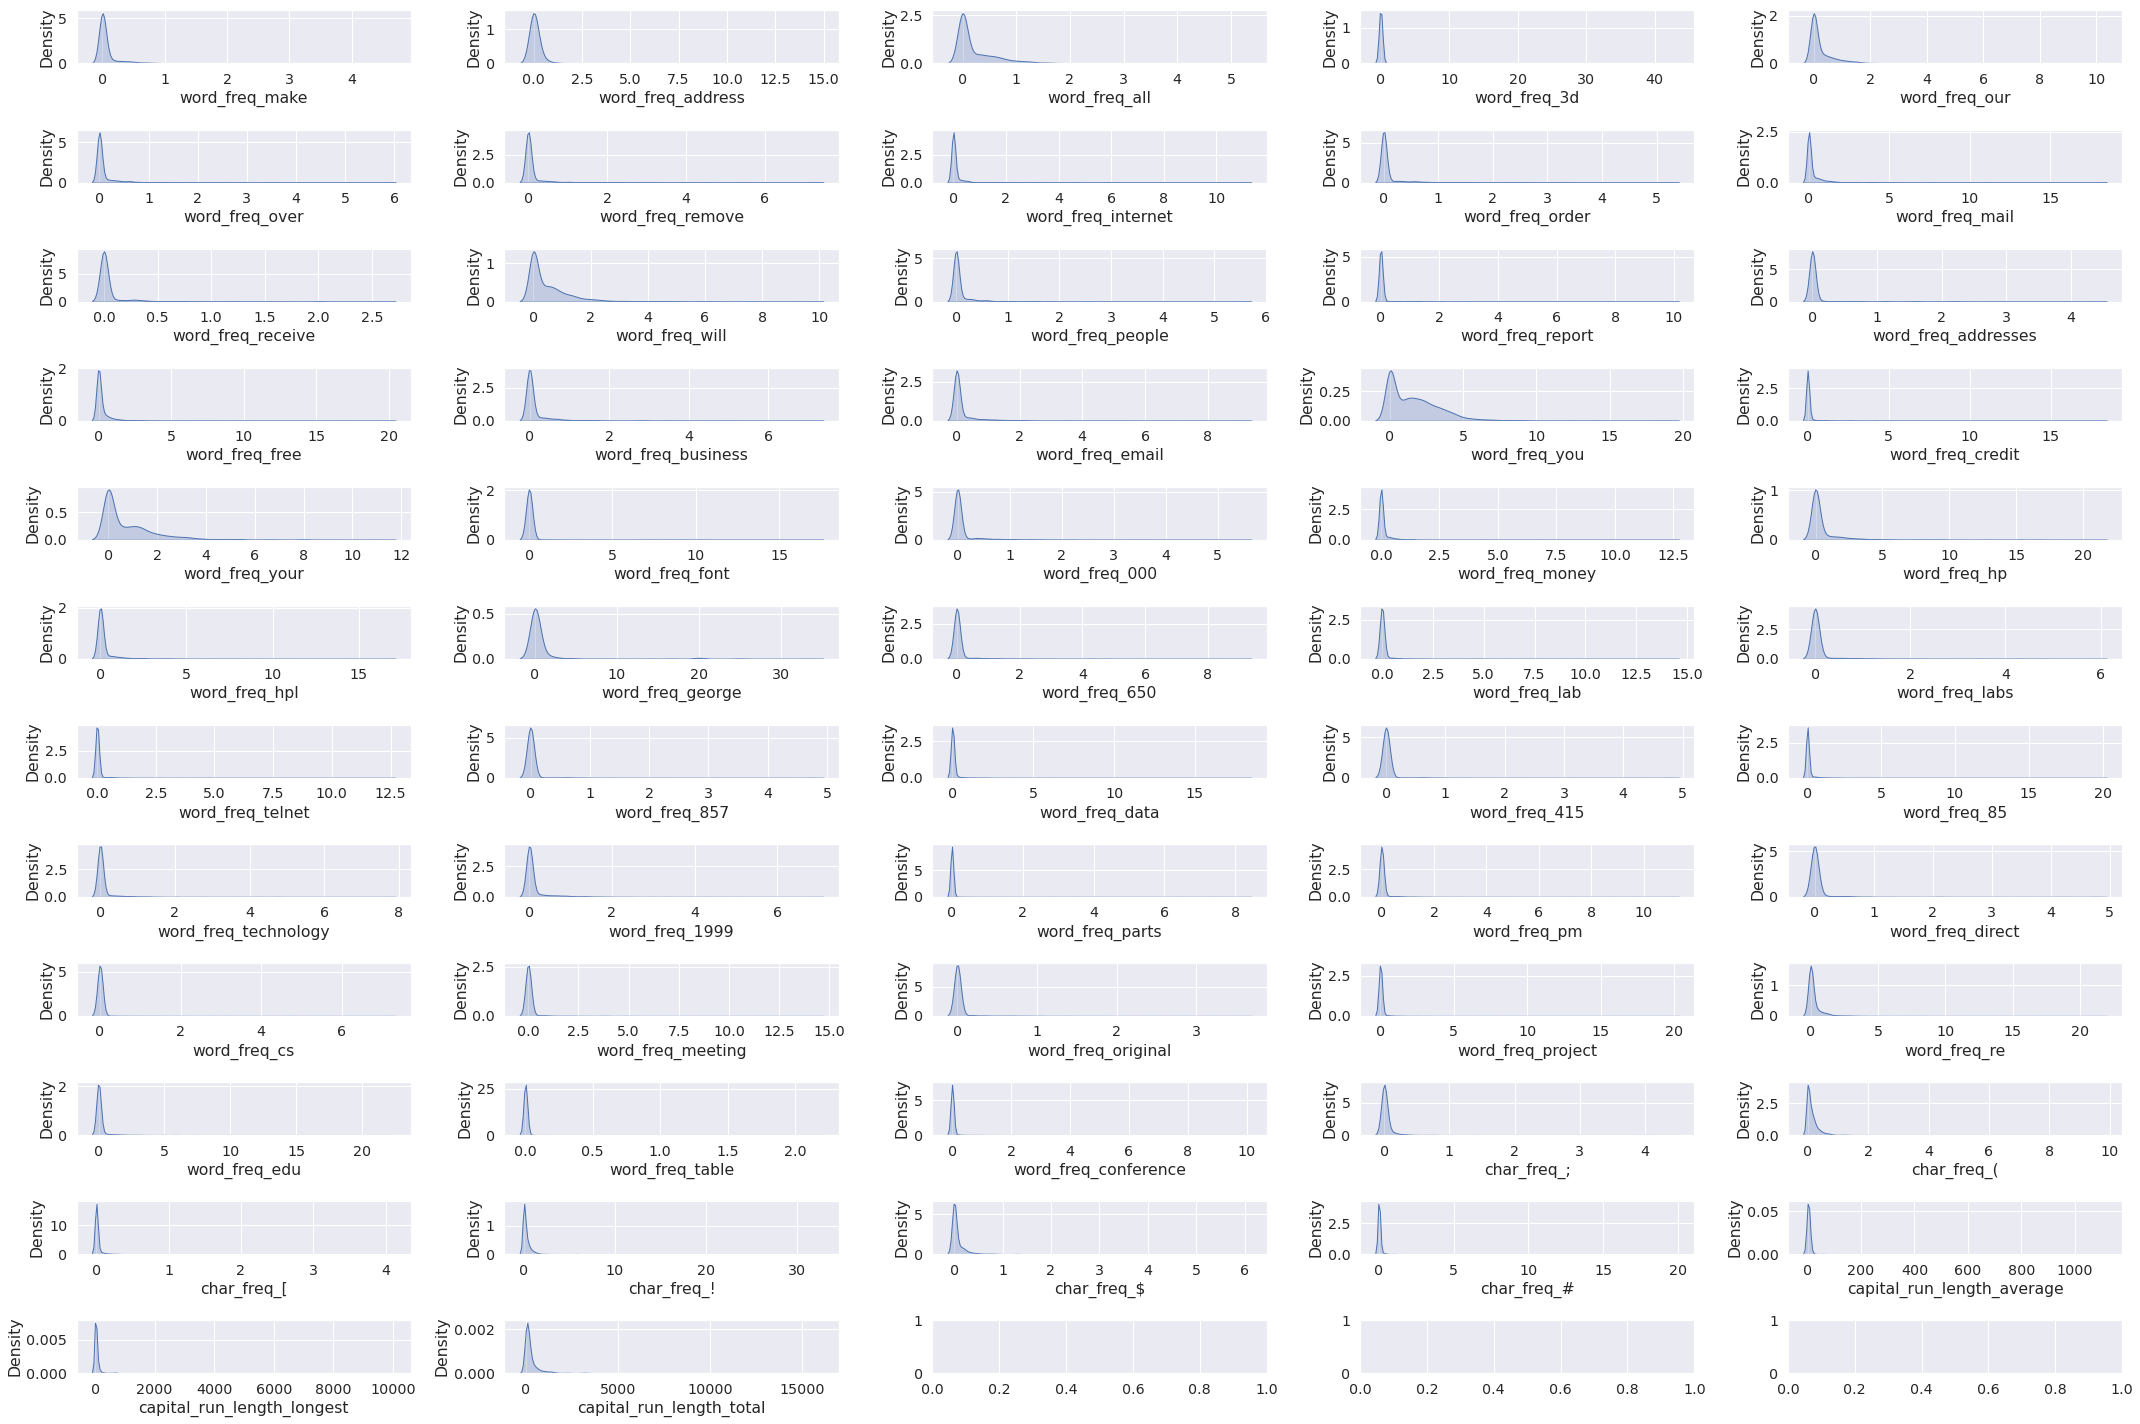

In [6]:
f = df.drop(columns={'spam'}, axis='columns')
f1 = f.describe()
f1

sns.set(font_scale=1.3)
fig, axes = plt.subplots(12, 5, figsize=(30, 20))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(f):
  plot = sns.kdeplot(data=f, x=c, ax=axes[i], fill=True)
plt.tight_layout()

From the graphs we can observe that the variables don't have a normal distribution.since for a normal distribution has a bell-sahaped figure around the mean.

### **2. Bivariate Analysis**

In [7]:
#import warnings
#warnings.simplefilter('ignore')
#sns.pairplot(hue="spam",
#             data=df)

## **Modelling**

### **a) Gaussian Naive Bayes Classifier**

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [10]:
# Splitting our dataset into its attributes and labels
# ---

X = df.drop(columns={'spam'}, axis='columns').values
y = df['spam'].values

In [11]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [12]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train)

In [13]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8067318132464713


The model has a score of 80.7%

### **b) Multinomial Naive Bayes Classifier**

In [15]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 

In [16]:
# Fitting our model 

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [17]:
# Evaluating the Model

predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8121606948968513


The model accuracy is 81.2%

### **c) Bernoulli Naive Bayes Classifier**

In [18]:
from sklearn.naive_bayes import BernoulliNB

In [20]:
# Training our Bernoulli Naive Bayes Classifier

# Train model
model = BernoulliNB().fit(X_train, y_train)

# model score
model.score(X_test, y_test)

0.8773072747014115

The model accuracy is 87.8%

## **70 - 30 Split**

I will use Bernoulli Naive Bayes since it has the highest accuracy score

In [21]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

In [22]:
# Training our Bernoulli Naive Bayes Classifier

# Train model
model = BernoulliNB().fit(X_train, y_train)

# model score
model.score(X_test, y_test)

0.8754525706010138

The model performance has reduced to 87.5%

## **60 - 40 Split**

In [26]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=0)

In [27]:
# Training our Bernoulli Naive Bayes Classifier

# Train model
model = BernoulliNB().fit(X_train, y_train)

# model score
model.score(X_test, y_test)

0.8772406300923411

## **Conclusion**

The more I increase the test set and reduce the training set the model accuracy reduces

## **Recommendation**

For the better performance of the model we need to use more data for the training set as observed.